In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [3]:
import pandas as pd  # Import pandas

# Load the dataset
data = pd.read_csv('/content/creditcard.csv', sep=',')

# Display first few rows
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.isnull().values.any()

False

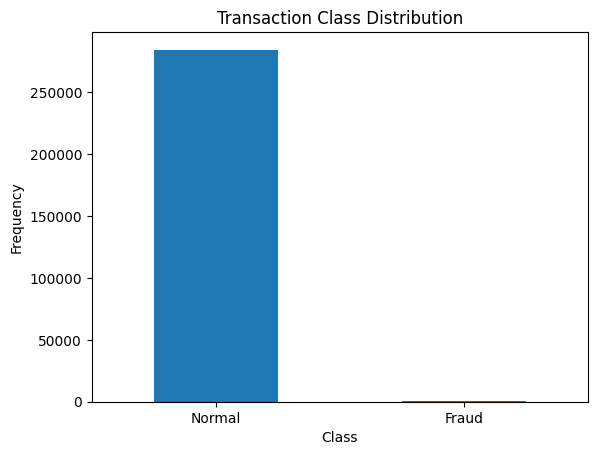

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Load dataset
data = pd.read_csv('/content/creditcard.csv')

# Corrected way to get class distribution
count_classes = data['Class'].value_counts(sort=True)

# Plot the distribution
count_classes.plot(kind='bar', rot=0)

# Fix the missing plt reference
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ["Normal", "Fraud"])
plt.xlabel("Class")
plt.ylabel("Frequency")

# Show the plot
plt.show()


In [ ]:
## Get the Fraud and the normal dataset

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [ ]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [ ]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
normal.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


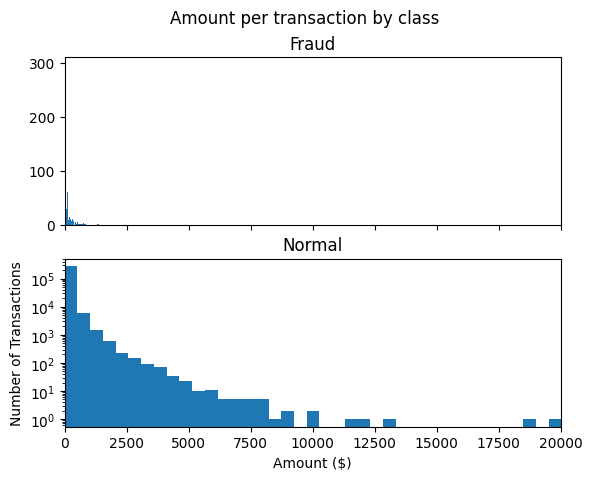

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


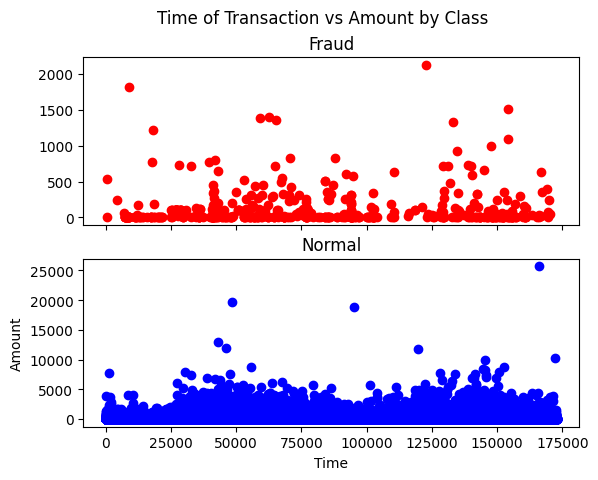

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/creditcard.csv')

# Ensure the 'Class' column exists
print(data.columns)

# Filter fraudulent and normal transactions
Fraud = data[data['Class'] == 1]   # Fraudulent transactions
Normal = data[data['Class'] == 0]  # Normal transactions

# Plot transaction time vs amount by class
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of Transaction vs Amount by Class')

ax1.scatter(Fraud['Time'], Fraud['Amount'], color='red', label='Fraud')
ax1.set_title('Fraud')

ax2.scatter(Normal['Time'], Normal['Amount'], color='blue', label='Normal')
ax2.set_title('Normal')

plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()


In [ ]:
## Take some sample of the data

data1= data.sample(frac = 0.1,random_state=1)

data1.shape

(28481, 31)

In [ ]:
data.shape

(284807, 31)

In [ ]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [ ]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


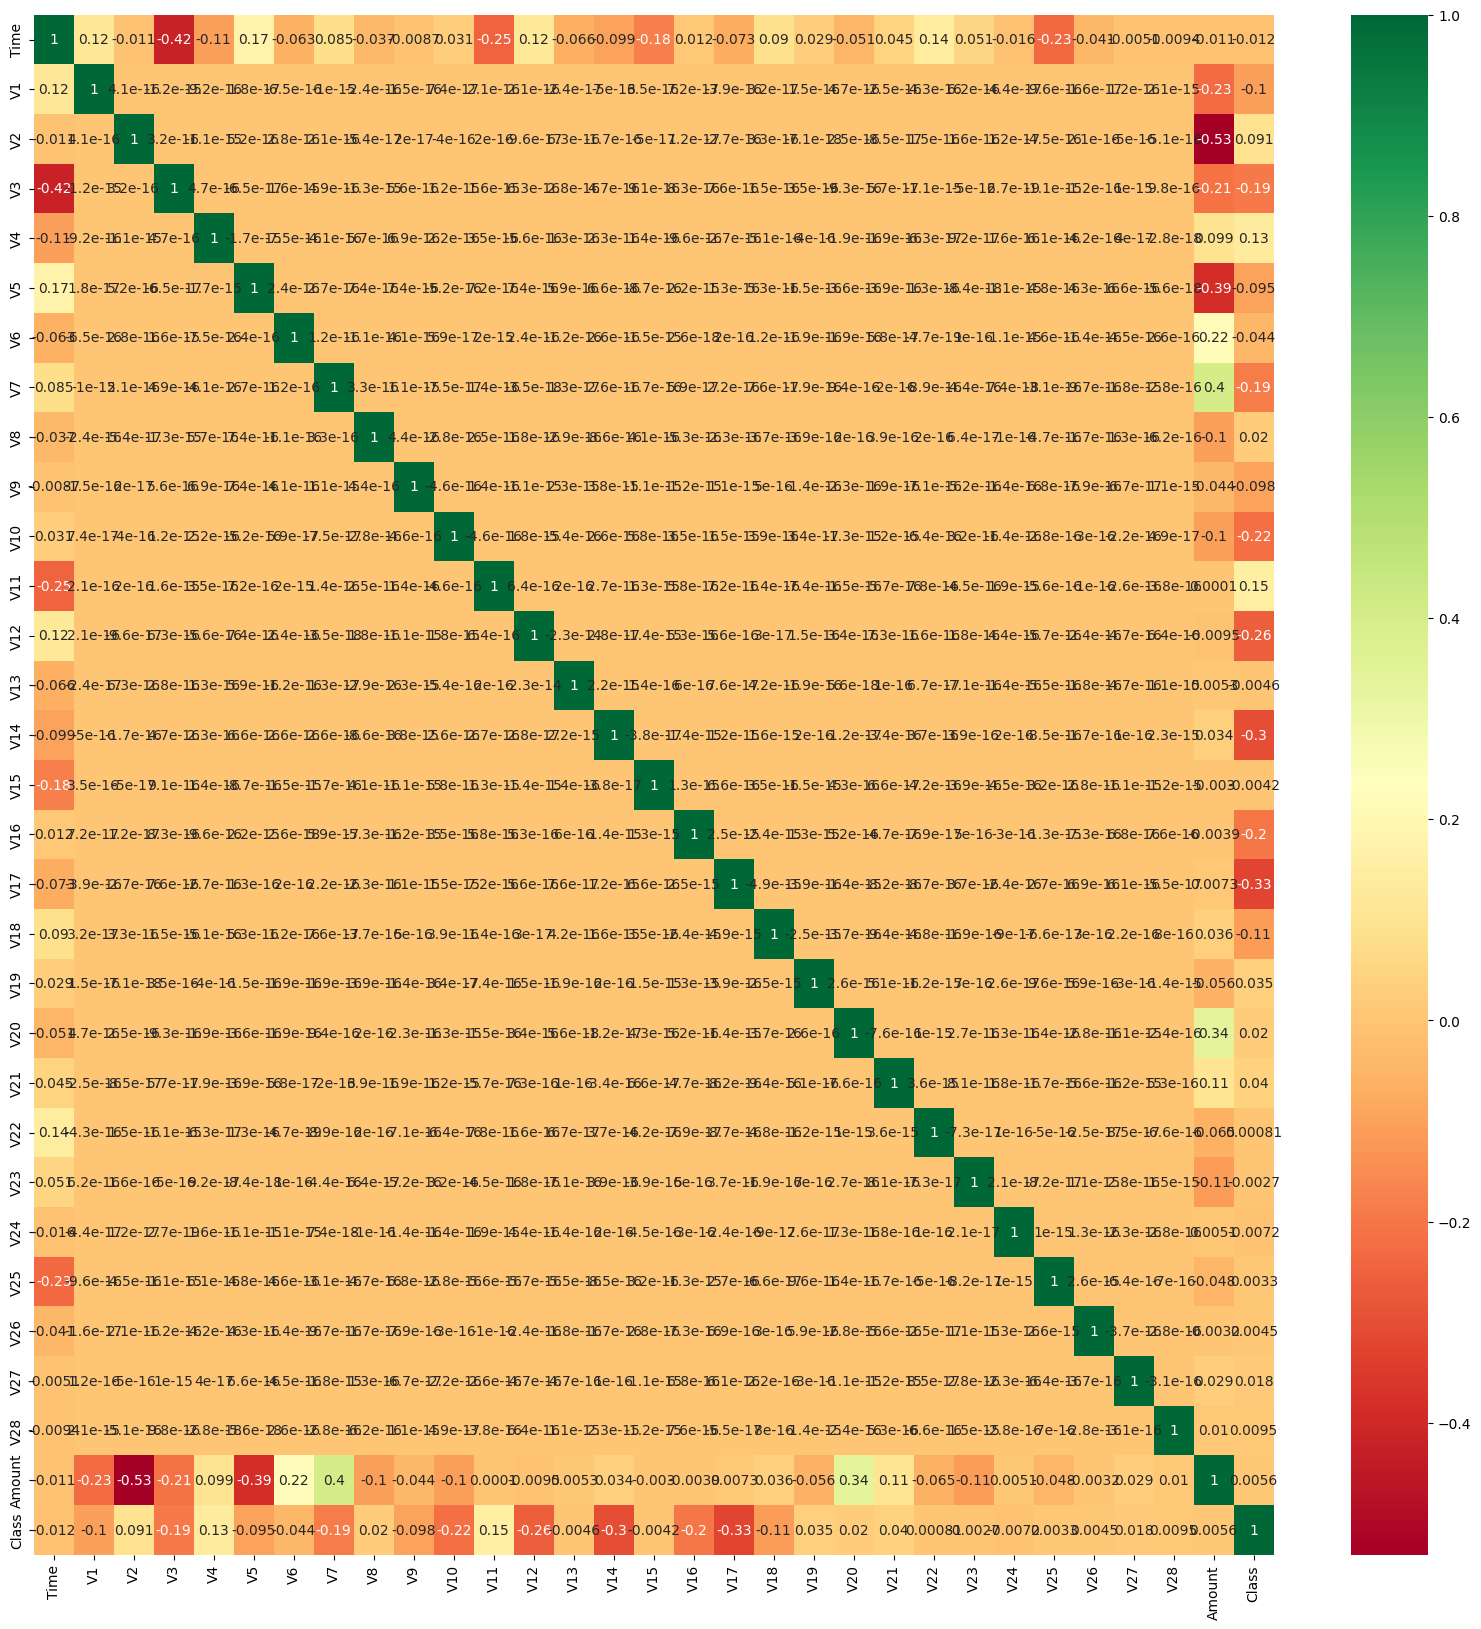

In [ ]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
import pandas as pd
import numpy as np  # Import numpy
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/creditcard.csv')

# Ensure the dataset has expected columns
print(data.columns)

# Define features and target
columns = data.columns[:-1]  # Assuming 'Class' is the last column
target = "Class"

# Define a random state
state = np.random.RandomState(42)

# Separate features and target
X = data[columns]
Y = data[target]

print("Data preparation successful!")



Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Data preparation successful!


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Load dataset
data = pd.read_csv('/content/creditcard.csv')

# Define features and target
columns = data.columns[:-1]  # Assuming 'Class' is the last column
target = "Class"

# Define a random state
state = np.random.RandomState(42)

# Separate features and target
X = data[columns]
Y = data[target]

# Define outlier fraction (adjust based on your dataset)
outlier_fraction = Y.value_counts()[1] / len(Y)

# Define the outlier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(X),
                                        contamination=outlier_fraction, random_state=state, verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                               leaf_size=30, metric='minkowski',
                                               p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine": OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05,
                                          max_iter=-1)
}


In [ ]:
type(classifiers)

dict

In [ ]:
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = pd.read_csv('/content/creditcard.csv')

# Handle missing and infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Ensure numeric target
target = "Class"
data[target] = pd.to_numeric(data[target], errors='coerce')
data.dropna(subset=[target], inplace=True)  # Drop rows with NaN in Class

# Define features and target
X = data.drop(columns=[target]).astype(float)  # Convert features to float
Y = data[target].astype(int)  # Convert target to integer

# Normalize data (important for SVM)
X = (X - X.mean()) / X.std()

# Define a random state
state = np.random.RandomState(42)

# Outlier fraction
outlier_fraction = Y.value_counts().get(1, 0) / len(Y)

# Define classifiers
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=0.2,  # Faster training
                                        contamination=outlier_fraction, random_state=state, verbose=1),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                               contamination=outlier_fraction, n_jobs=-1),  # Parallel processing
}

# **Reduce dataset size for SVM**
svm_sample_size = min(len(X), 5000)  # Use 5000 samples or less
svm_X = X.sample(n=svm_sample_size, random_state=state)
svm_Y = Y.loc[svm_X.index]

classifiers["Support Vector Machine"] = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05, max_iter=1000)

# Fit and evaluate models
for clf_name, clf in classifiers.items():
    print(f"\n🔹 Running {clf_name}...")

    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(svm_X)
        y_pred = clf.predict(svm_X)
        y_true = svm_Y
    else:  # Isolation Forest
        clf.fit(X)
        y_pred = clf.predict(X)
        y_true = Y

    # Convert predictions: 1 → Normal, -1 → Fraud
    y_pred = np.where(y_pred == 1, 0, 1)

    # Count errors
    n_errors = (y_pred != y_true).sum()
    print(f"🔹 {clf_name} detected {n_errors} errors.")

    # Accuracy and classification report
    print(f"✅ Accuracy Score: {accuracy_score(y_true, y_pred):.4f}")
    print(f"📊 Classification Report:\n{classification_report(y_true, y_pred)}")


🔹 Running Isolation Forest...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s


🔹 Isolation Forest detected 702 errors.
✅ Accuracy Score: 0.9975
📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.29      0.29      0.29       492

    accuracy                           1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807


🔹 Running Local Outlier Factor...
